# APPLIED STATISTICAL LEARNING FOR DETERMINING SIGNIFICANT ELECTROSPINNING PARAMETERS AFFECTING DIAMETER AND QUALITY OF POLYETHYLENE TEREPHTHALATE NANOFIBERS

## Muhammad Kevin Alrahmanto (muhammad.kevin@mail.ugm.ac.id/ kevin082@live.com)

# Abstract

**Electrospinning** (ES) is a widely used **technique for producing nanofibers** for various applications. However, optimizing ES parameters to achieve the desired **fiber diameter** and **fiber quality (beads-free**) remains a complex challenge due to the influence of multiple parameters on the final fiber outcomes. In this study, **statistical learning** was employed to **identify significant parameters** that affect fiber diameter and fiber quality, specifically for **fibers made from polyethylene terephthalate (PET)**. The data collected for this research was **gathered from numerous published studies on PET nanofibers available in Google Scholar**. The dataset includes ES parameters such as concentration, voltage, flow rate, trifluoroacetic acid (TFA)/dichloromethane (DCM) solvent ratio, needle-to-collector distance, and collector rotation frequency. Additionally, data on fiber diameter and fiber quality generated from these parameters were also collected. By employing statistical learning techniques, namely **regression** and **classification**, the data were analyzed to discover patterns and relationships between the ES parameters and fiber diameter and fiber quality. The statistical learning technique employed to model fiber diameter was **multiple linear regression**. Meanwhile, **logistic regression** was utilized to model fiber quality. According to the analysis of the multiple linear regression model, concentration and TFA/DCM solvent ratio were identified as the most significant parameters in explaining nanofiber diameter. Meanwhile, the analysis of the logistic regression model revealed that concentration, voltage, and needle-to-collector distance were the most significant parameters in explaining fiber quality.

### Statistical learning vs Machine learning 

- Machnine learning focuses on large scale applications and prediction accuracy 
- Statistical learning emphasizes models interpretability and uncertainty


### Electrospinning apparatus

<div>
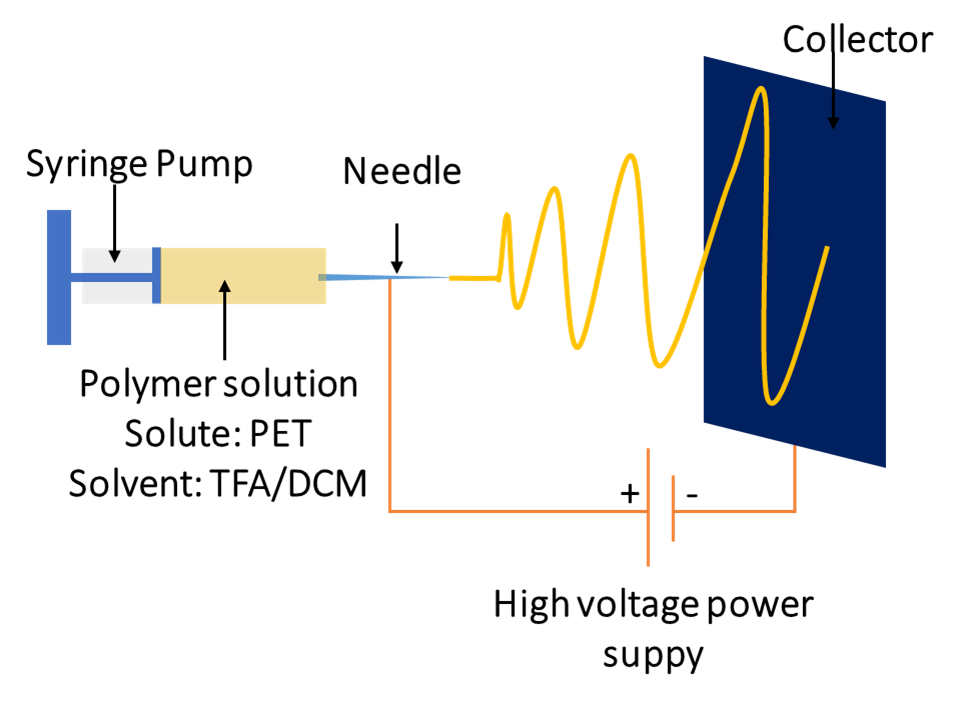
</div>

### Input variables & output variables
The data used in this study consisted of 33 observations from 10 studies covering the period from 2008 to 2022. Information on input variables (C, V, F, R, L, and ω) and output variables (D and Q) were collected. All data were ensured to use only PET polymer and TFA/DCM solvent as the polymer solution composition.

Variables with numerical values, namely C, V, F, R, L, ω, and D, were ensured to have pre-established units. All observations of variable R, which were previously in the form of ratios, were converted to decimal. For example, if the TFA/DCM (v/v) ratio is 50:50, the decimal value is 50/50 = 1. Some observations of variable ω were recorded as zero for data observations that used a static collector. Variable Q is a categorical variable that indicates fiber quality (smooth/fibrous).

Input variables:
- PET Concentration in %w/v (**C**)
- Voltage in kv (**V**) 
- Flow rate in ml/h (**F**)
- Trifluoroacetic acid (TFA)/dichloromethane (DCM) solvent ratio in v/v (**R**)
- Needle-to-collector distance in cm (**L**)
- Collector rotation frequency in rpm (**ω**)

Output variables:
- Fiber diameter in nm (**D**)
- Fiber quality (beaded/smooth) (**Q**)

### Nanofiber 
a) Beaded fibers, b) Smooth fibers (https://doi.org/10.1016/j.ces.2015.07.038)
<div>
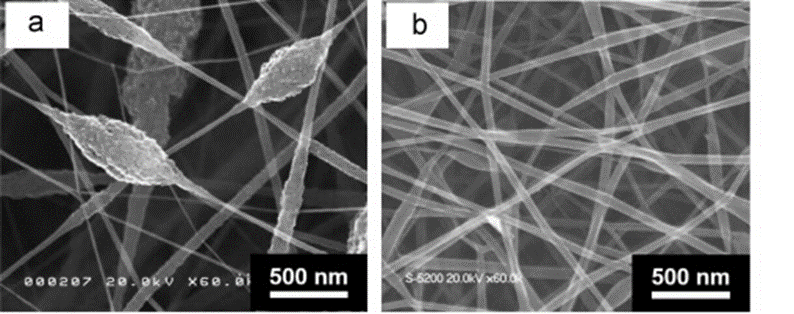
</div>

### Goal
The purpose of this study is to determine **the significant parameters** that affect the output diameter and quality of fibers by using statistical learning.

# 1. Exploratory data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import seaborn as sns
import scienceplots
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.genmod.families.links import logit
from itertools import combinations
import regression_diagnostics_sm as ras
plt.style.use(['notebook','high-vis'])

### Load the data

In [2]:
df=pd.read_excel('data_pet.xlsx')
df['Q'] = df['Q'].replace(['Bermanik', 'Halus'], ['Beaded', 'Smooth'])
df

,C,V,F,R,ω,L,D,Q
0,10.0,26.0,12.0000,0.428571,900,12,201.00,Beaded
1,10.0,26.0,12.0000,1.000000,900,12,209.00,Beaded
2,10.0,26.0,12.0000,2.333333,900,12,215.00,Beaded
3,20.0,26.0,12.0000,0.428571,900,12,496.00,Beaded
4,20.0,26.0,12.0000,1.000000,900,12,374.00,Beaded
5,20.0,26.0,12.0000,2.333333,900,12,420.00,Beaded
6,30.0,26.0,12.0000,0.428571,900,12,729.00,Smooth
7,30.0,26.0,12.0000,1.000000,900,12,625.00,Smooth
8,30.0,26.0,12.0000,2.333333,900,12,544.00,Smooth
9,7.7,14.0,0.0500,1.000000,390,15,400.00,Smooth


### Descriptive statistics

In [3]:
np.round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
C,33.0,17.96,7.06,7.70,12.0,20.00,22.50,30.0
V,33.0,18.05,6.15,10.00,14.0,15.00,26.00,26.0
F,33.0,3.82,5.11,0.05,0.5,1.00,12.00,12.0
R,33.0,1.66,1.14,0.33,1.0,1.00,2.33,4.0
ω,33.0,417.58,465.93,0.00,0.0,300.00,900.00,2000.0
L,33.0,14.15,2.76,10.00,12.0,15.00,15.00,22.0
D,33.0,491.31,334.91,105.00,215.0,471.58,680.00,1800.0


### Pairplot

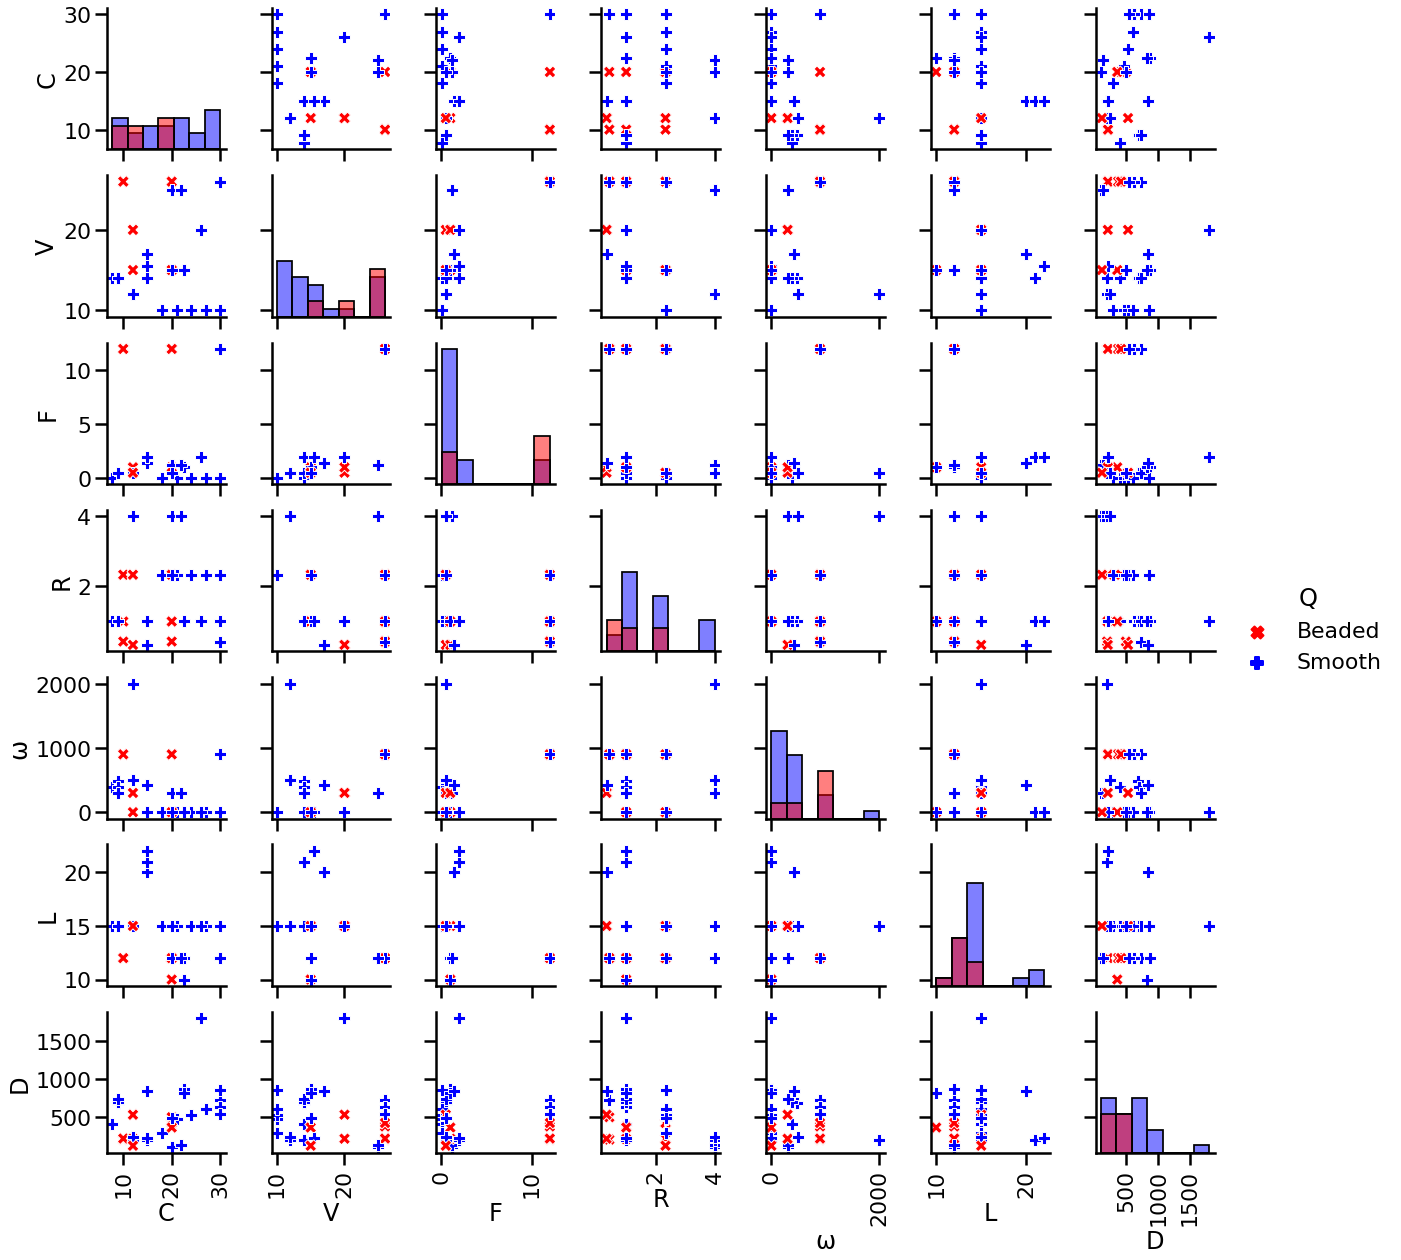

In [4]:
sns.set_context("poster")
palette = ["red","blue"]
g = sns.pairplot(data=df, hue="Q", markers=["X", "P"],  
                diag_kind="hist", 
                palette=sns.color_palette(palette, 2))
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)

In [5]:
sns.set_context("paper")

### Pearson correlation

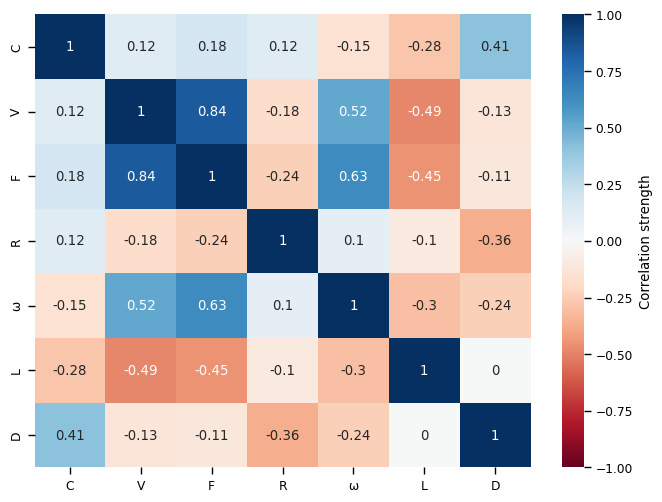

In [6]:
plt.figure(dpi = 100)
normalize = mcolors.TwoSlopeNorm(vcenter=0, vmin=-1, vmax=1)
colormap = cm.RdBu
sns.heatmap(np.round(df.corr(method='pearson'),2),  
            annot=True, norm=normalize, cmap=colormap, 
            cbar_kws={'label': 'Correlation strength'});

### Boxplot with min (0) - max (1) transformation

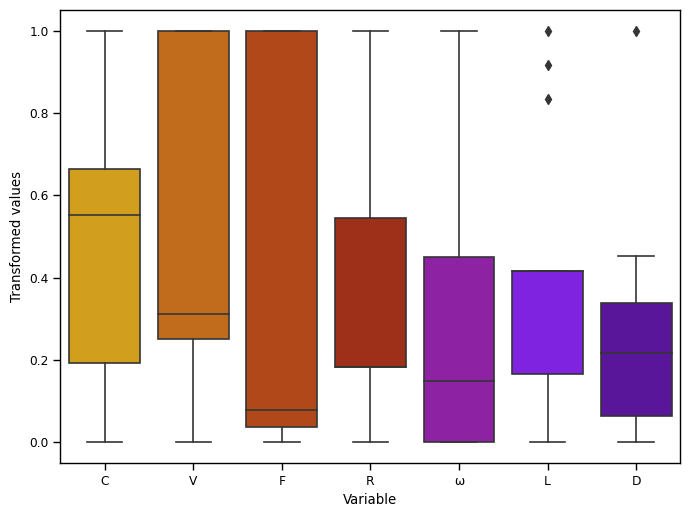

In [7]:
scaler_minmax= MinMaxScaler()
df_scaled=pd.DataFrame(scaler_minmax.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
plt.figure(dpi = 100)
sns.boxplot(x="variable", y="value", data=pd.melt(df_scaled), palette='gnuplot_r')
plt.xlabel('Variable')
plt.ylabel('Transformed values');

### KDE Plot

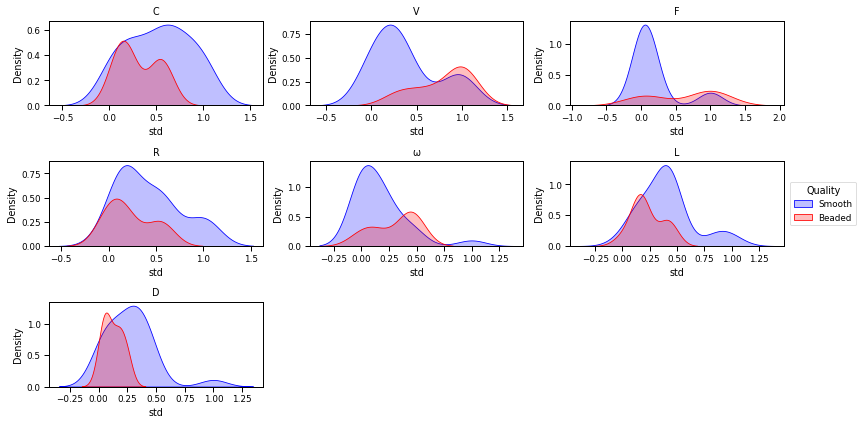

In [8]:
df_scaled['Q']=df['Q']
plt.subplots(2, 3, figsize=(12,6))
for num,col in enumerate(df_scaled.columns[:-1]):
    plt.subplot(3, 3,num+1)
    sns.kdeplot(data=df_scaled, x=col, hue='Q', 
                shade=True, palette=sns.color_palette(palette, 2))
    plt.title(col)
    plt.xlabel('std')
    if num != 5:
        plt.legend(['']).remove()
    else :
        plt.legend(['Smooth','Beaded'],title='Quality',
                   bbox_to_anchor=(1.01, 0.5), loc="center left")
plt.tight_layout();

# 2. Multiple Linear Regression

### Transforming data into standard deviation unit

In [9]:
scaler= StandardScaler()
df_mlr=pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_mlr.head()

,C,V,F,R,ω,L,D
0,-1.145211,1.313551,1.624006,-1.088160,1.051462,-0.790844,-0.880274
1,-1.145211,1.313551,1.624006,-0.581206,1.051462,-0.790844,-0.856016
2,-1.145211,1.313551,1.624006,0.601689,1.051462,-0.790844,-0.837823
3,0.293387,1.313551,1.624006,-1.088160,1.051462,-0.790844,0.014216
4,0.293387,1.313551,1.624006,-0.581206,1.051462,-0.790844,-0.355708


### Wald test

In [10]:
X = sm.add_constant(df_mlr.iloc[:, :-1])  
Y = df_mlr.iloc[:,-1] 
model_1= sm.OLS(Y, X).fit() 
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      D   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     3.708
Date:                Wed, 12 Jul 2023   Prob (F-statistic):            0.00851
Time:                        23:25:39   Log-Likelihood:                -36.623
No. Observations:                  33   AIC:                             87.25
Df Residuals:                      26   BIC:                             97.72
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.804e-16      0.144   1.25e-15      1.000      -0.296       0.296
C              0.5931      0.170      3.492      0.002       0.244       0.942
V             -0.0178      0.272     -0.065      0.948      -0.577       0.541
F             -0.5163      0.328     -1.572      0.128      -1.191       0.159
R             -0.5895      0.169     -3.480      0.002      -0.938      -0.241
ω              0.2222      0.219      1.012      0.321      -0.229       0.673
L             -0.0679      0.174     -0.390      0.700      -0.426       0.290
==============================================================================
Omnibus:                       28.037   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.282
Skew:                           1.852   Prob(JB):                     2.45e-15
Kurtosis:                       8.934   Cond. No.                         4.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
significant_mlr=pd.read_html(model_1.summary().tables[1].as_html(), header=0, index_col=0)[0]
significant_mlr[significant_mlr['P>|t|'] < 0.1]

,coef,std err,t,P>|t|,[0.025,0.975]
C,0.5931,0.170,3.492,0.002,0.244,0.942
R,-0.5895,0.169,-3.480,0.002,-0.938,-0.241


### Partial regression plot


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


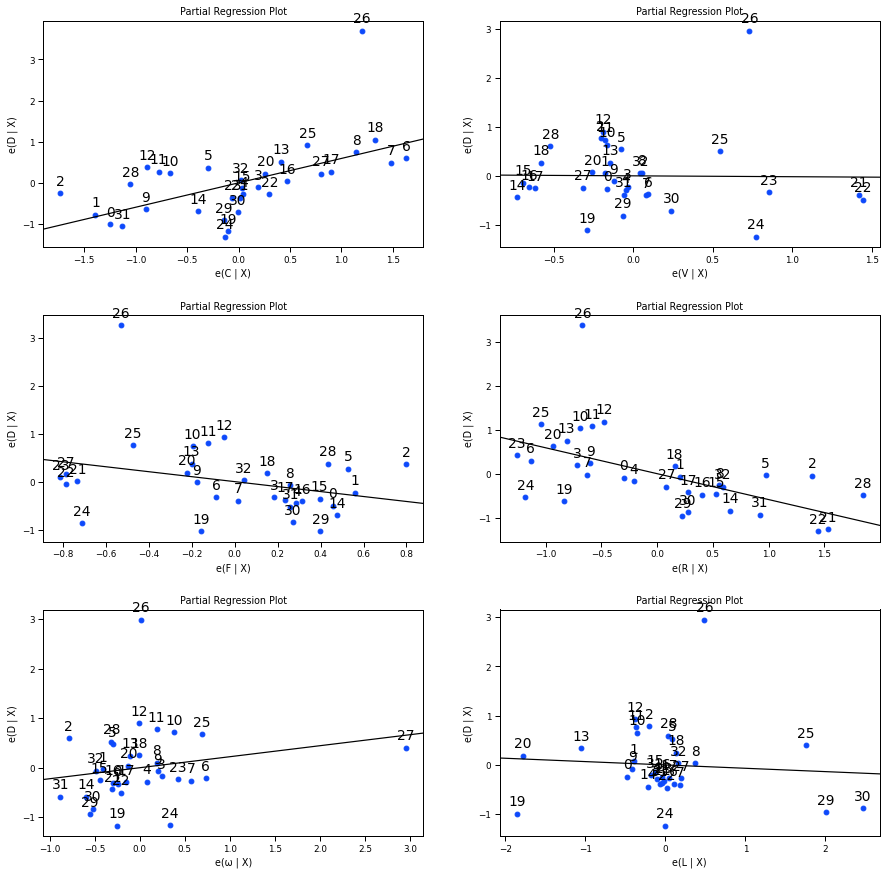

In [12]:
input_var =df_mlr.columns[:-1]    
fig, axs = plt.subplots(3,2, figsize=(15, 15))
fig.subplots_adjust(hspace = .3, wspace=.2)
axs = axs.ravel()
for num, variable in enumerate(input_var):
    sm.graphics.plot_partregress("D", variable,list(input_var[input_var!= variable]), 
                                            data=df_mlr, ax=axs[num]);

### Fit Plot

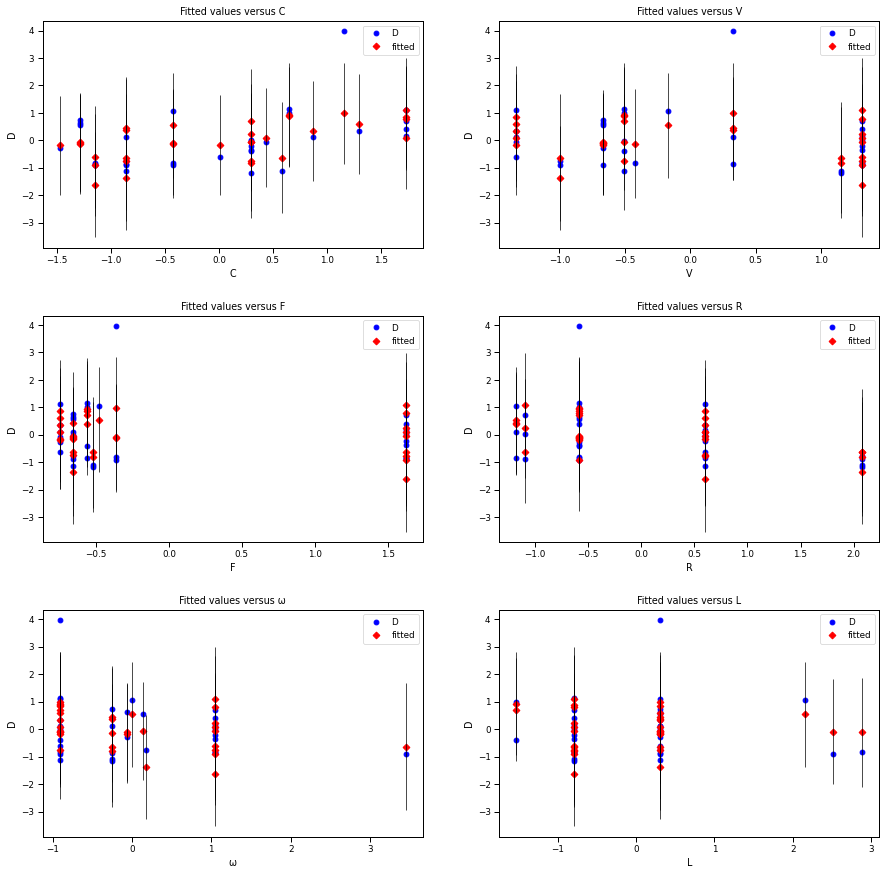

In [13]:
fig, axs = plt.subplots(3,2, figsize=(15, 15))
fig.subplots_adjust(hspace = .3, wspace=.2)
axs = axs.ravel()
for num, variable in enumerate(input_var):
    fig = sm.graphics.plot_fit(model_1, variable, ax=axs[num])

### Outlier detection

(0.46,
                coef  std err             t  P>|t|  [0.025  0.975]
 const  1.804000e-16    0.144  1.250000e-15  1.000  -0.296   0.296
 C      5.931000e-01    0.170  3.492000e+00  0.002   0.244   0.942
 V     -1.780000e-02    0.272 -6.500000e-02  0.948  -0.577   0.541
 F     -5.163000e-01    0.328 -1.572000e+00  0.128  -1.191   0.159
 R     -5.895000e-01    0.169 -3.480000e+00  0.002  -0.938  -0.241
 ω      2.222000e-01    0.219  1.012000e+00  0.321  -0.229   0.673
 L     -6.790000e-02    0.174 -3.900000e-01  0.700  -0.426   0.290)

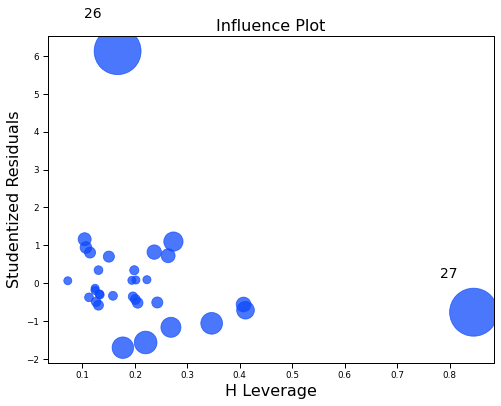

In [14]:
def outlier_detection(data):
    X = sm.add_constant(data.iloc[:, :-1])  
    Y = data.iloc[:,-1] 
    model= sm.OLS(Y, X).fit() 
    beta_test=pd.read_html(model.summary().tables[1].as_html(), header=0, index_col=0)[0]
    sm.graphics.influence_plot(model, criterion = "cooks")
    return np.round(model.rsquared,2), beta_test
outlier_detection(df_mlr)

#### Let's check the outlier

In [15]:
df.iloc[[26,27], :]

,C,V,F,R,ω,L,D,Q
26,26.0,20.0,2.0,1.0,0,15,1800.0,Smooth
27,12.0,12.0,0.5,4.0,2000,15,200.0,Smooth


#### What happened if outlier data were deleted


(0.69,
          coef  std err      t  P>|t|  [0.025  0.975]
 const -0.0043    0.087 -0.050  0.961  -0.184   0.175
 C      0.5213    0.103  5.078  0.000   0.309   0.733
 V     -0.4635    0.163 -2.847  0.009  -0.800  -0.127
 F     -0.6589    0.231 -2.851  0.009  -1.136  -0.182
 R     -0.4647    0.095 -4.914  0.000  -0.660  -0.270
 ω      1.0163    0.276  3.682  0.001   0.447   1.586
 L     -0.1208    0.097 -1.248  0.224  -0.321   0.079)

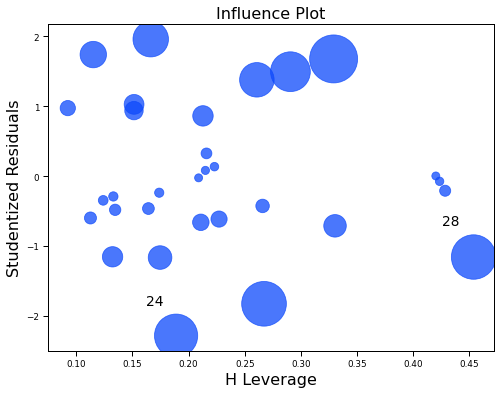

In [16]:
df_mlr_drop=df_mlr.drop([26, 27])
outlier_detection(df_mlr_drop)

### More Diagnostics

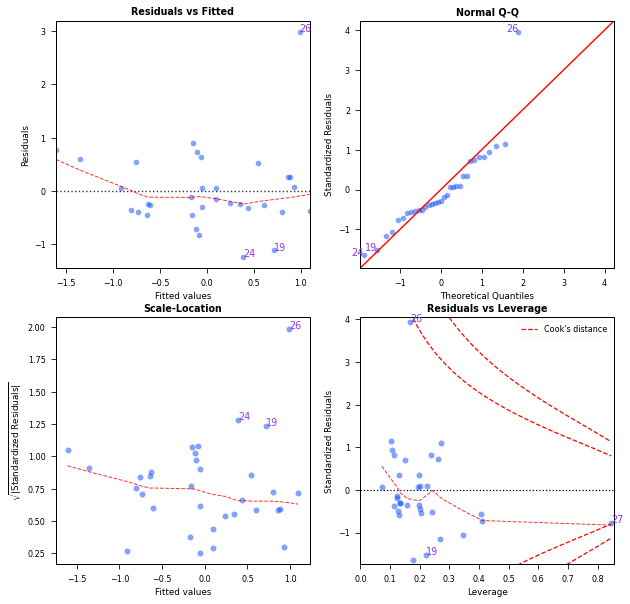

  Features  VIF Factor
0    const        1.00
4        R        1.38
1        C        1.39
6        L        1.47
5        ω        2.32
2        V        3.57
3        F        5.21


In [17]:
cls = ras.LinearRegDiagnostic(model_1)
vif, fig, ax = cls()
print(vif)

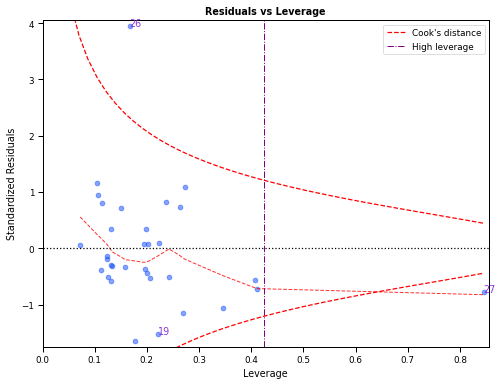

In [18]:
cls.leverage_plot(high_leverage_threshold=True, cooks_threshold='dof');

In [19]:
df.iloc[[19, 24, 26,27], :]

,C,V,F,R,ω,L,D,Q
19,20.0,15.0,1.0,1.000000,0,10,360.0,Beaded
24,12.0,20.0,1.0,0.333333,300,15,212.0,Beaded
26,26.0,20.0,2.0,1.000000,0,15,1800.0,Smooth
27,12.0,12.0,0.5,4.000000,2000,15,200.0,Smooth


### Multiple linear regression with  lasso and ridge regularization

In [20]:
def regularization(data, lasso_wt):
    X= data.iloc[:, :-1] 
    y = data.iloc[:,-1] 
    model = sm.OLS(y, X)
    results_fu = model.fit()
    coefs = []
    r_2=[]
    bic=[]
    lambdas = np.logspace(-3, 2, 30)
    for n in  lambdas.tolist():
        results_fr = model.fit_regularized(L1_wt=lasso_wt, alpha=n, 
                                           start_params=results_fu.params)
        results_fr_fit = sm.regression.linear_model.OLSResults(model, 
                                                               results_fr.params, 
                                                               model.normalized_cov_params)
        coefs.append(results_fr.params)
        r_2.append(results_fr_fit.rsquared)
        bic.append(results_fr_fit.bic)
    
    fig, ax = plt.subplots()
    fig.subplots_adjust(right=0.75)
    
    marker = list(Line2D.markers)
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'purple']
    
    twin1 = ax.twinx()
    twin2 = ax.twinx()
    twin2.spines.right.set_position(("axes", 1.2))
    
    for i, coef in enumerate(np.array(coefs).T):
        p1, = ax.plot(lambdas, coef, marker=marker[i % len(marker)],
                      color=colors[i % len(colors)], label=df.columns[i], alpha=0.6)
    p2, = twin1.plot(lambdas, r_2, color='black', linewidth=3, label="$R^2$")
    p3, = twin2.plot(lambdas, bic, color='gray', linewidth=3,  alpha=0.8, label="BIC")

    ax.set( xlabel="$\lambda$", ylabel="Coefficient", xscale="log")
    twin1.set( ylabel="$R^2$")
    twin2.set( ylabel="BIC")

    twin1.yaxis.label.set_color(p2.get_color())
    twin2.yaxis.label.set_color(p3.get_color())

    ax.tick_params(axis='y', colors='black')
    twin1.tick_params(axis='y', colors=p2.get_color())
    twin2.tick_params(axis='y', colors=p3.get_color())
    
    fig.legend(bbox_to_anchor=(1.01, 0.5), loc="center left", borderaxespad=0, ncol=1)


    return coefs, r_2, bic, ax

### Lasso regularization

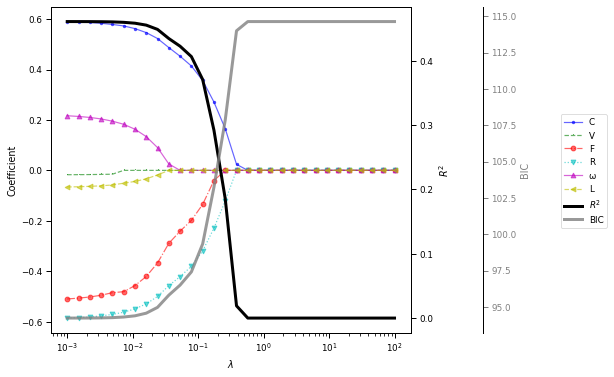

In [21]:
regularization(df_mlr, 1)[3];

### Ridge regularization

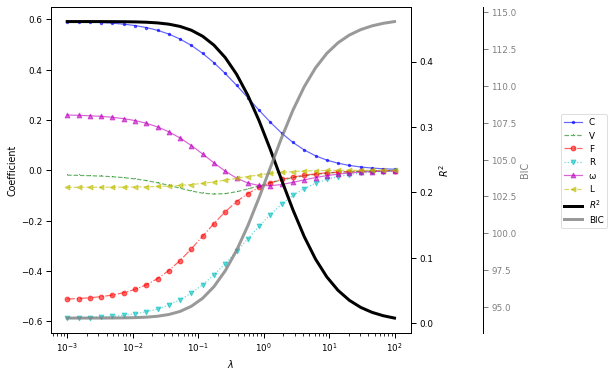

In [22]:
regularization(df_mlr, 0)[3];

### All possible combinations

In [23]:
X = np.array(df_mlr.iloc[:, :-1])
y =np.array(df_mlr.iloc[:, -1])

In [24]:
n_features = X.shape[1]
all_combinations = [combinations(range(n_features), i+1) for i in range(n_features)]
all_combinations = [item for sublist in all_combinations for item in sublist]
r_2 = []
for i, subset in enumerate(all_combinations):
    lr = LinearRegression(fit_intercept=True)
    lr.fit(X[:, list(subset)], y)
    y_pred = lr.predict(X[:, list(subset)])
    r_2.append(  1 - ((y - y_pred)**2).sum() / ((y - y.mean())**2).sum()  )

In [64]:
res=pd.DataFrame(np.stack([all_combinations, r_2])).T
res['length']=res[0].apply(lambda x : len(x))
res=res.rename(columns = {0:'Variable', 1:'r_squared'})

C:\Users\Kevin\anaconda3\lib\site-packages\numpy\core\shape_base.py:420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arrays = [asanyarray(arr) for arr in arrays]


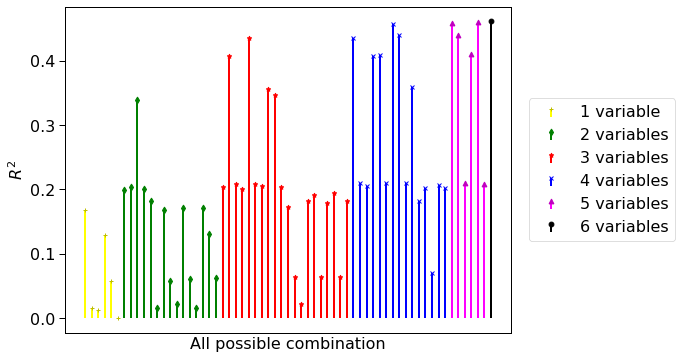

In [26]:
with plt.style.context(['notebook', 'high-vis']):
    plt.stem( res[res['length']==1][1].index,res[res['length']==1][1],linefmt='yellow', 
             markerfmt='y+',label ='1 variable',basefmt=" " )
    plt.stem( res[res['length']==2][1].index,res[res['length']==2][1],linefmt='green',
             markerfmt='gd',label ='2 variables',basefmt=" " )
    plt.stem( res[res['length']==3][1].index,res[res['length']==3][1],linefmt='red', 
             markerfmt='r*',label ='3 variables',basefmt=" " )
    plt.stem( res[res['length']==4][1].index,res[res['length']==4][1],linefmt='blue', 
             markerfmt='bx',label ='4 variables',basefmt=" " )
    plt.stem( res[res['length']==5][1].index,res[res['length']==5][1],linefmt='magenta', 
             markerfmt='m^',label ='5 variables',basefmt=" " )
    plt.stem( res[res['length']==6][1].index,res[res['length']==6][1],linefmt='black', 
             markerfmt='ko',label ='6 variables',basefmt=" " )
    plt.xlabel('All possible combination')
    plt.ylabel('$R^2$')
    plt.tick_params(
        axis='x',          
        which='both',      
        bottom=False,      
        top=False,         
        labelbottom=False) 
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0);

In [73]:
res['Variable']=res['Variable'].apply(lambda x: list(df_mlr.columns[:-1][[np.array(x)]]))

C:\Users\Kevin\anaconda3\lib\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [80]:
res.sort_values('r_squared', ascending=False).head(10)

,Variable,r_squared,length
62,"[C, V, F, R, ω, L]",0.461135,6
60,"[C, F, R, ω, L]",0.461046,5
56,"[C, V, F, R, ω]",0.457986,5
47,"[C, F, R, ω]",0.457969,4
57,"[C, V, F, R, L]",0.439904,5
48,"[C, F, R, L]",0.439478,4
41,"[C, V, F, R]",0.436097,4
25,"[C, F, R]",0.436058,3
59,"[C, V, R, ω, L]",0.40993,5
45,"[C, V, R, L]",0.409392,4


# 3. Logistic Regression

In [27]:
pre_df_lr=df.drop('D', axis=1)
pre_df_lr['Q']=pd.get_dummies(pre_df_lr['Q'])['Smooth']
pre_df_lr.tail()

,C,V,F,R,ω,L,Q
28,12.0,12.0,0.5,4.000000,500,15,1
29,15.0,14.0,2.0,1.000000,0,21,1
30,15.0,15.5,2.0,1.000000,0,22,1
31,12.0,15.0,0.5,2.333333,0,15,0
32,20.0,15.0,0.5,2.333333,0,15,1


### First attempt

In [28]:
scaler= StandardScaler()
df_lr=pd.DataFrame(scaler.fit_transform(pre_df_lr.iloc[:, :-1]), columns=pre_df_lr.columns[:-1])
df_lr['Smooth']=pre_df_lr['Q']
df_lr.tail()

,C,V,F,R,ω,L,Smooth
28,-0.857492,-0.998299,-0.659580,2.080306,0.179647,0.311882,1
29,-0.425912,-0.668035,-0.361721,-0.581206,-0.910122,2.517334,1
30,-0.425912,-0.420336,-0.361721,-0.581206,-0.910122,2.884910,1
31,-0.857492,-0.502902,-0.659580,0.601689,-0.910122,0.311882,0
32,0.293387,-0.502902,-0.659580,0.601689,-0.910122,0.311882,1


In [29]:
coefs = []
pseudo_r2=[]
lambdas = np.logspace(-2.5, 0.00001, 30)
for n in  lambdas.tolist():
    try: 
        model_lr= sm.GLM.from_formula("Smooth ~ C + V + F + R + ω + L", 
                                family=sm.families.family.Binomial(link=logit()), 
                                data=df_lr)
        hasil = model_lr.fit_regularized(alpha=n,method='elastic_net',L1_wt=1,refit=True)
        coefs.append(hasil.params)
        pseudo_r2.append(pd.read_html(hasil.summary().tables[0].as_html())[0].iloc[7,3])
    except:
        coefs.append(np.array([np.nan]*(len(df_mlr.columns[:-1])+1)))
        pseudo_r2.append(np.nan)

C:\Users\Kevin\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:246: RuntimeWarning: divide by zero encountered in true_divide
  return (2*p - 1) / v**2
C:\Users\Kevin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:566: RuntimeWarning: invalid value encountered in multiply
  tmp = score_factor * tmp
C:\Users\Kevin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1346: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
C:\Users\Kevin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1346: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
C:\Users\Kevin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1346: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
C:\Users\Kevin\anaconda3\lib\site-packages\statsm

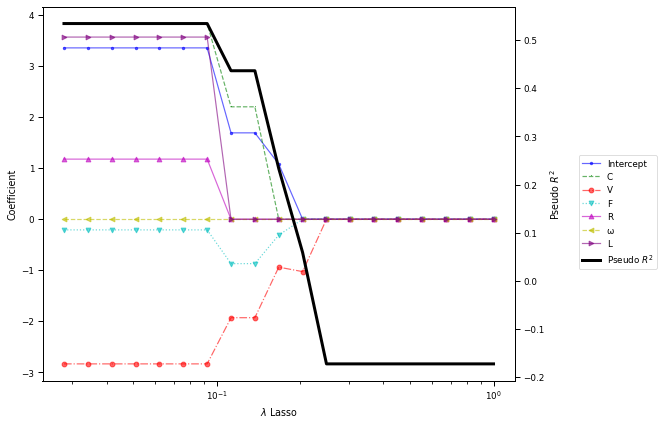

In [30]:
fig, ax1 = plt.subplots()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'purple']
marker = list(Line2D.markers)
label = np.hstack(['Intercept',df_lr.columns[:-1]])
for i, coef in enumerate(np.array(coefs).T):
    ax1.plot(lambdas, coef, marker=marker[i % len(marker)],
             color=colors[i % len(colors)], label=label[i], alpha=0.6)
ax1.set_xscale("log")
ax1.set_xlabel("$\lambda$ Lasso")
ax1.set_ylabel("Coefficient")

ax2=ax1.twinx()
ax2.plot(lambdas, pseudo_r2, color='black', label='Pseudo $R^2$', linewidth=3)
ax2.set_ylabel('Pseudo $R^2$')
ax2.grid(False)
plt.tight_layout()
fig.legend(bbox_to_anchor=(1.01, 0.5), loc="center left", borderaxespad=0, ncol=1);

In [31]:
result_lambda=pd.DataFrame({'lambda': lambdas,'pseudo r-squared': pseudo_r2})
result_lambda=result_lambda.sort_values('pseudo r-squared', ascending=False).dropna()
result_lambda

,lambda,pseudo r-squared
11,0.028072,0.5346
12,0.034236,0.5346
13,0.041754,0.5346
14,0.050922,0.5346
15,0.062102,0.5346
16,0.075738,0.5346
17,0.092368,0.5346
18,0.112650,0.4365
19,0.137384,0.4365
20,0.167550,0.2333


In [32]:
model_lr_final= sm.GLM.from_formula("Smooth ~ C + V + F + R + ω + L", 
                                    family=sm.families.family.Binomial(link=logit()), 
                                    data=df_lr)
model_lr_final = model_lr_final.fit_regularized(alpha=result_lambda.iloc[0,0],
                                                method='elastic_net',
                                                L1_wt=1,refit=True) 
model_lr_final.summary()

C:\Users\Kevin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1346: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Smooth   No. Observations:                   33
Model:                            GLM   Df Residuals:                       27
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                   elastic_net   Log-Likelihood:                -7.6232
Date:                Wed, 12 Jul 2023   Deviance:                       15.246
Time:                        23:27:23   Pearson chi2:                     36.7
No. Iterations:                    50   Pseudo R-squ. (CS):             0.5346
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3576      1.676      2.004      0.045       0.073       6.642
C              3.8344      2.003      1.914      0.056      -0.092       7.760
V             -2.8344      1.759     -1.611      0.107      -6.283       0.614
F             -0.2089      1.341     -0.156      0.876      -2.837       2.419
R              1.1778      0.916      1.286      0.198      -0.617       2.972
ω                   0          0        nan        nan           0           0
L              3.5695      2.132      1.674      0.094      -0.610       7.749
==============================================================================
"""

In [33]:
lr_check=df.copy()
lr_check['Prob_Smooth']=np.round(model_lr_final.predict()*100,2)

def get_Q_pred(percentage):
    return 'Smooth' if percentage > 50 else 'Beaded'

def model_validation(real, predicted):
    return 'Succes' if real==predicted else 'Failed'

lr_check['Q_pred'] = lr_check.apply(lambda x: get_Q_pred(x.Prob_Smooth), axis=1)
lr_check['Validation'] = lr_check.apply(lambda x: model_validation(x.Q, x.Q_pred), axis=1)
lr_check

,C,V,F,R,ω,L,D,Q,Prob_Smooth,Q_pred,Validation
0,10.0,26.0,12.0000,0.428571,900,12,201.00,Beaded,0.01,Beaded,Succes
1,10.0,26.0,12.0000,1.000000,900,12,209.00,Beaded,0.02,Beaded,Succes
2,10.0,26.0,12.0000,2.333333,900,12,215.00,Beaded,0.07,Beaded,Succes
3,20.0,26.0,12.0000,0.428571,900,12,496.00,Beaded,2.45,Beaded,Succes
4,20.0,26.0,12.0000,1.000000,900,12,374.00,Beaded,4.36,Beaded,Succes
5,20.0,26.0,12.0000,2.333333,900,12,420.00,Beaded,15.52,Beaded,Succes
6,30.0,26.0,12.0000,0.428571,900,12,729.00,Smooth,86.20,Smooth,Succes
7,30.0,26.0,12.0000,1.000000,900,12,625.00,Smooth,91.90,Smooth,Succes
8,30.0,26.0,12.0000,2.333333,900,12,544.00,Smooth,97.86,Smooth,Succes
9,7.7,14.0,0.0500,1.000000,390,15,400.00,Smooth,54.40,Smooth,Succes


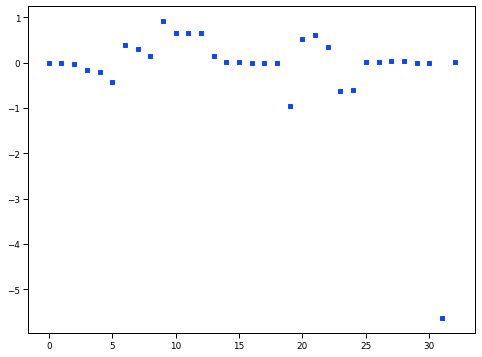

In [84]:
plt.plot(model_lr_final.resid_pearson, 's');

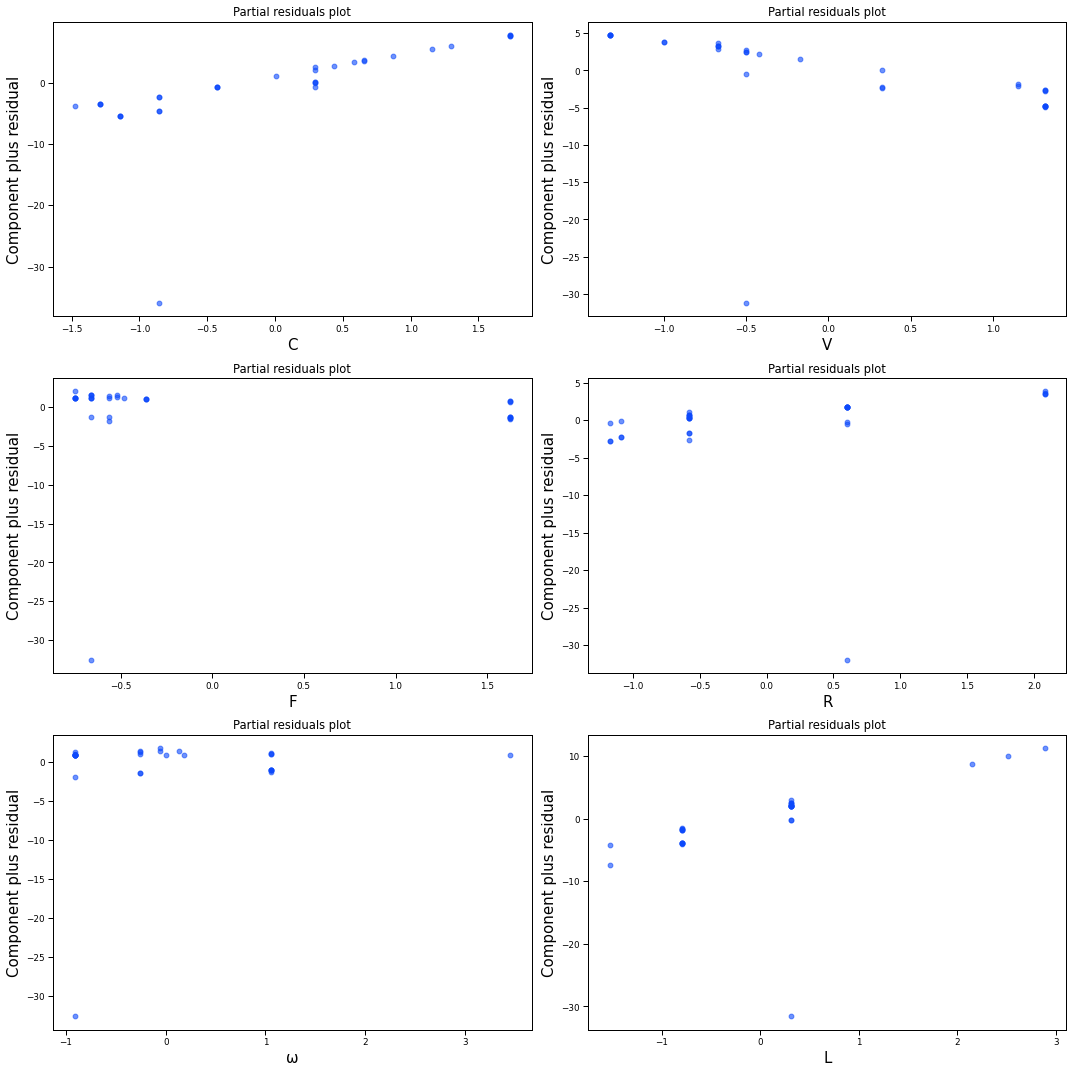

In [35]:
input_var =df_mlr.columns[:-1]    
fig, axs = plt.subplots(3,2, figsize=(15, 15))
fig.subplots_adjust(hspace = .3, wspace=.2)
axs = axs.ravel()
for num, variable in enumerate(input_var):
    model_lr_final.plot_partial_residuals(variable, ax=axs[num])
plt.tight_layout();

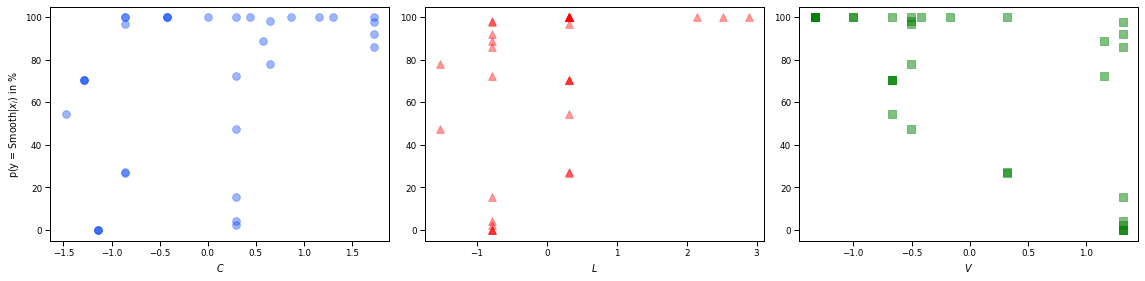

In [36]:
fig, ax=plt.subplots(1,3, figsize=(16,4))
ax[0].scatter(df_lr['C'], lr_check['Prob_Smooth'], marker='o',s=60, alpha=0.4)
ax[1].scatter(df_lr['L'], lr_check['Prob_Smooth'], c='red',marker='^',s=60, alpha=0.4)
ax[2].scatter(df_lr['V'], lr_check['Prob_Smooth'], c='green',marker='s',s=60, alpha=0.5)
ax[0].set_xlabel('$C$');
ax[1].set_xlabel('$L$');
ax[2].set_xlabel('$V$');
ax[0].set_ylabel('p(y = Smooth|$x_i$) in %')
plt.tight_layout();